# Import libs

In [1]:
# sklearn libs
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Lasso

# implemented structure
from src.handleData import handleData
from src.handleClassifier import handleClassifier
from src.handleResult import handleResult

# Load data

In [2]:
hD = handleData("./data/data.csv")  # construct handleData object
df = hD.loadData("id")  # load the data
labels = hD.encodeLabels(df, "species")  # get labels
dfTrain, dfTest = hD.splitData(df, 0.7, "species")  # get the training and testing sets

# No feature trimming

In [3]:


# The selected classifiers and their config
classifierList = [
    {
        "name": "LinearDiscriminantAnalysis",
        "preprocess": False,
        "fitStrategy": {
            "option": "CV",
            "config": {"n_jobs": -1, "scoring": "accuracy"},
        },
    },
    {
        "name": "QuadraticDiscriminantAnalysis",
        "preprocess": False,
        "fitStrategy": {
            "option": "CV",
            "config": {"n_jobs": -1, "scoring": "accuracy"},
        },
    },
    {
        "name": "LogisticRegression",
        "preprocess": True,
        "fitStrategy": {
            "option": "GridSearch",
            "config": {
                "param_grid": {
                    "clf__C": [0.01, 0.05, 0.1, 0.5, 1.0, 1.5, 2.0],
                },
                "n_jobs": -1,
                "scoring": "accuracy",
            },
        },
    },
    {
        "name": "SGDClassifier",
        "config": {"loss": "log_loss"},
        "preprocess": True,
        "fitStrategy": {
            "option": "GridSearch",
            "config": {
                "param_grid": {
                    "clf__alpha": [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 2.0],
                },
                "n_jobs": -1,
                "scoring": "accuracy",
            },
        },
    },
    {
        "name": "DecisionTreeClassifier",
        "preprocess": False,
        "fitStrategy": {
            "option": "GridSearch",
            "config": {
                "param_grid": {
                    "clf__min_samples_leaf": list(range(1, 6)),
                    "clf__min_samples_split": list(range(2, 12, 2)),
                    "clf__max_depth": list(range(1, 11)),
                },
                "n_jobs": -1,
                "scoring": "accuracy",
            },
        },
    },
    {
        "name": "RandomForestClassifier",
        "preprocess": False,
        "fitStrategy": {
            "option": "GridSearch",
            "config": {
                "param_grid": {
                    "clf__min_samples_leaf": list(range(1, 6)),
                    "clf__min_samples_split": list(range(2, 12, 2)),
                    "clf__n_estimators": [50, 75, 100],
                    "clf__max_depth": list(range(1, 6)),
                },
                "n_jobs": -1,
                "scoring": "accuracy",
            },
        },
    },
    {
        "name": "AdaBoostClassifier",
        "preprocess": False,
        "config": {"base_estimator": DecisionTreeClassifier()},
        "fitStrategy": {
            "option": "GridSearch",
            "config": {
                "param_grid": {
                    "clf__base_estimator__max_depth": [1, 5, 10],
                    "clf__n_estimators": [50, 75, 100],
                    "clf__learning_rate": [0.01, 0.1, 1.0],
                },
                "n_jobs": -1,
                "scoring": "accuracy",
            },
        },
    },
    {
        "name": "BaggingClassifier",
        "preprocess": False,
        "config": {"base_estimator": DecisionTreeClassifier()},
        "fitStrategy": {
            "option": "GridSearch",
            "config": {
                "param_grid": {
                    "clf__base_estimator__max_depth": [1, 5, 10],
                    "clf__n_estimators": [50, 75, 100],
                    "clf__max_samples": [0.25, 0.5, 0.75, 1.0],
                    "clf__max_features": [0.25, 0.5, 0.75, 1.0],
                },
                "n_jobs": -1,
                "scoring": "accuracy",
            },
        },
    },
]

hC = handleClassifier()  # construct handleClassifier object
clf = hC.fitClassifiers(dfTrain, classifierList)  # fit

AdaBoostClassifier, GridSearchCV best score = 0.8903868209780003
BaggingClassifier, GridSearchCV best score = 0.8528307788551768
DecisionTreeClassifier, GridSearchCV best score = 0.16296527994995308
LinearDiscriminantAnalysis, CV score = 0.950891460744448
LogisticRegression, GridSearchCV best score = 0.9870086539464081
QuadraticDiscriminantAnalysis, CV score = 0.03606506099468251
RandomForestClassifier, GridSearchCV best score = 0.7142633719111667
SGDClassifier, GridSearchCV best score = 0.9581274111145867


# Feature reduction (PCA)

In [4]:
# change the config for a feature reduction
for classifierDict in classifierList:
    classifierDict["preprocess"] = True
    classifierDict["feature"] = {"option": "reduction"}
    classifierDict["fitStrategy"]["option"] = "GridSearch"

    if not "param_grid" in classifierDict["fitStrategy"]["config"]:
        classifierDict["fitStrategy"]["config"]["param_grid"] = dict()

    classifierDict["fitStrategy"]["config"]["param_grid"]["ftr__n_components"] = [
        0.5,
        0.75,
        0.85,
    ]

clfReduction = hC.fitClassifiers(dfTrain, classifierList)  # fit

AdaBoostClassifier, GridSearchCV best score = 0.9235429048065894
BaggingClassifier, GridSearchCV best score = 0.9365238244187258
DecisionTreeClassifier, GridSearchCV best score = 0.5512251068710249
LinearDiscriminantAnalysis, GridSearchCV best score = 0.971129183609634
LogisticRegression, GridSearchCV best score = 0.981253258262955
QuadraticDiscriminantAnalysis, GridSearchCV best score = 0.12835992075904495
RandomForestClassifier, GridSearchCV best score = 0.7619122093629445
SGDClassifier, GridSearchCV best score = 0.9336148472526326


# Feature selection (Lasso)

In [5]:
# change the config for a feature selection
for classifierDict in classifierList:
    classifierDict["feature"]["option"] = "selection"
    classifierDict["feature"]["config"] = {"estimator": Lasso()}
    del classifierDict["fitStrategy"]["config"]["param_grid"]["ftr__n_components"]
    classifierDict["fitStrategy"]["config"]["param_grid"]["ftr__estimator__alpha"] = [
        1.0,
        2.5,
        5.0,
    ]

clfSelection = hC.fitClassifiers(dfTrain, classifierList)  # fit

AdaBoostClassifier, GridSearchCV best score = 0.8571160462934001
BaggingClassifier, GridSearchCV best score = 0.8917526848086748
DecisionTreeClassifier, GridSearchCV best score = 0.27846939839432805
LinearDiscriminantAnalysis, GridSearchCV best score = 0.9047753101866334
LogisticRegression, GridSearchCV best score = 0.9220519236784487
QuadraticDiscriminantAnalysis, GridSearchCV best score = 0.03179021999791472
RandomForestClassifier, GridSearchCV best score = 0.6926076530080284
SGDClassifier, GridSearchCV best score = 0.864320717339172


# Prediction results
## No feature trimming

,Accuracy,Precision,Recall,F1-score,AUC
AdaBoostClassifier,0.922559,0.939057,0.922559,0.917196,0.998133
BaggingClassifier,0.932660,0.946970,0.932660,0.929149,0.997011
DecisionTreeClassifier,0.205387,0.173272,0.205387,0.165875,0.845238
LinearDiscriminantAnalysis,0.969697,0.978283,0.969697,0.968182,0.999983
LogisticRegression,0.976431,0.983333,0.976431,0.975108,0.999977
QuadraticDiscriminantAnalysis,0.030303,0.044793,0.030303,0.031514,0.510204
RandomForestClassifier,0.767677,0.770034,0.767677,0.745110,0.990861
SGDClassifier,0.973064,0.979798,0.973064,0.971284,0.999880


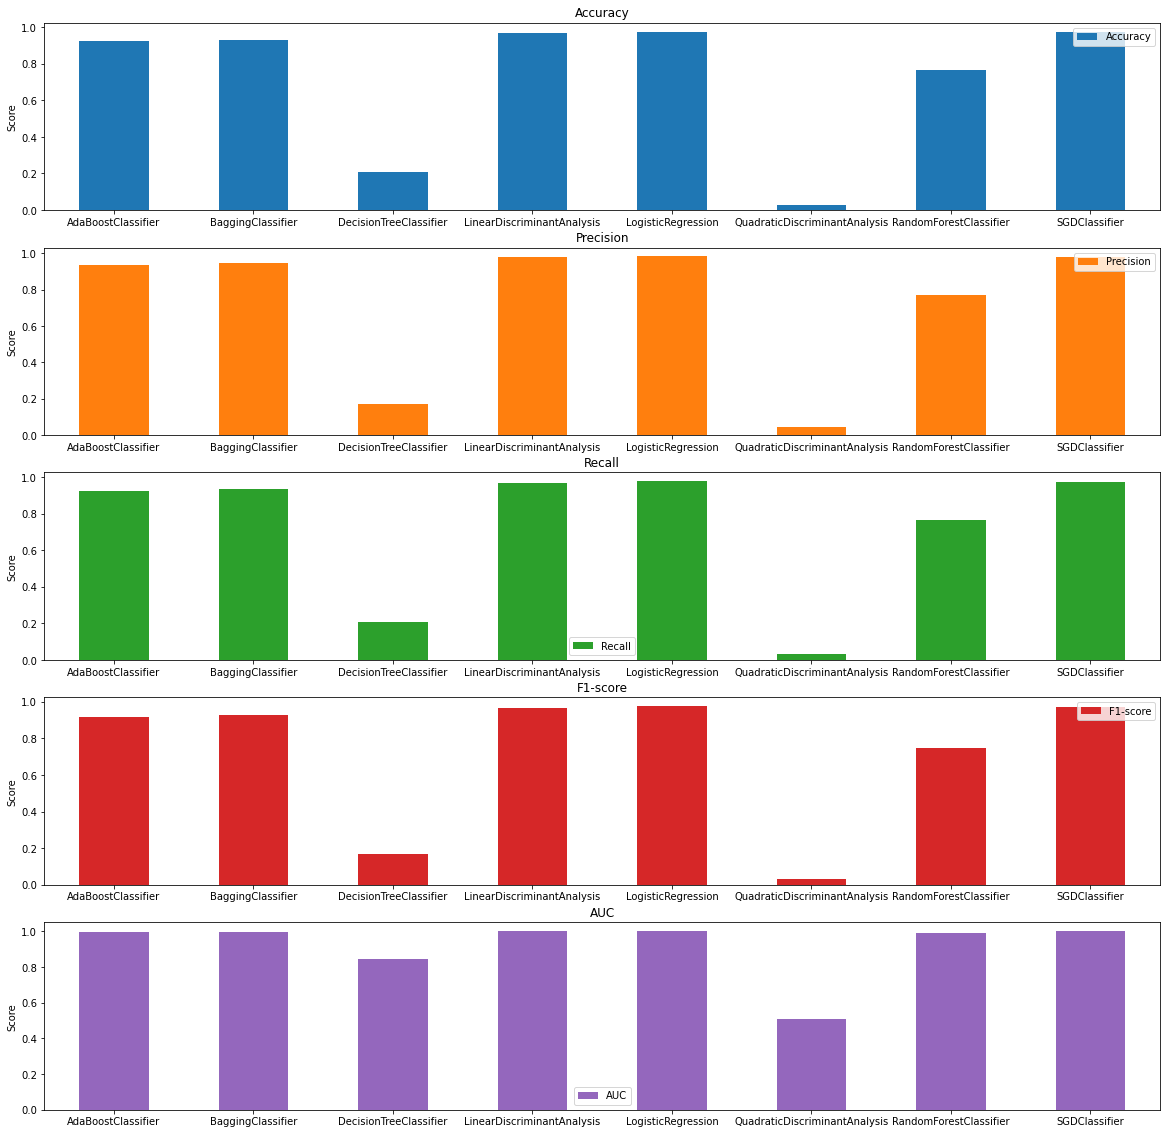

In [6]:
hR = handleResult()
hR.predictionResult(dfTest, clf)
hR.plotBarChart()

## Feature reduction (PCA)

,Accuracy,Precision,Recall,F1-score,AUC
AdaBoostClassifier,0.942761,0.956566,0.942761,0.940115,0.998339
BaggingClassifier,0.949495,0.961448,0.949495,0.947595,0.999004
DecisionTreeClassifier,0.602694,0.628122,0.602694,0.577795,0.844448
LinearDiscriminantAnalysis,0.973064,0.980808,0.973064,0.970635,1.000000
LogisticRegression,0.973064,0.979798,0.973064,0.970274,0.999954
QuadraticDiscriminantAnalysis,0.636364,0.654199,0.636364,0.615821,0.979460
RandomForestClassifier,0.845118,0.846248,0.845118,0.825974,0.995946
SGDClassifier,0.936027,0.945791,0.936027,0.927345,0.999668


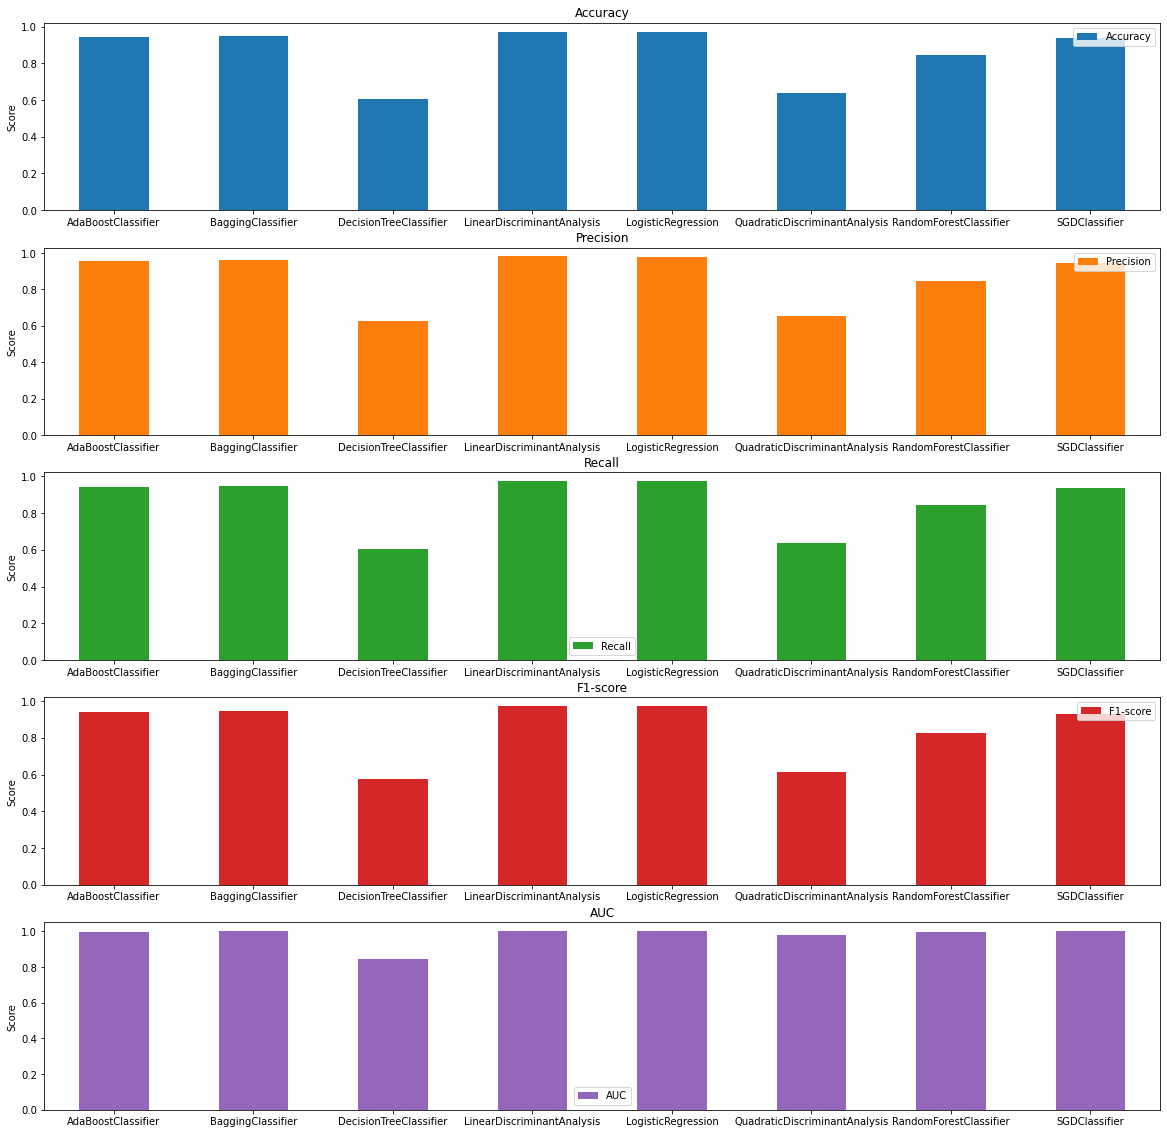

In [7]:
hR.predictionResult(dfTest, clfReduction)
hR.plotBarChart()

## Feature selection (Lasso)

,Accuracy,Precision,Recall,F1-score,AUC
AdaBoostClassifier,0.922559,0.926383,0.922559,0.913901,0.997297
BaggingClassifier,0.919192,0.932828,0.919192,0.916234,0.998672
DecisionTreeClassifier,0.303030,0.292409,0.303030,0.266237,0.791864
LinearDiscriminantAnalysis,0.925926,0.947475,0.925926,0.920996,0.997332
LogisticRegression,0.966330,0.973906,0.966330,0.965464,0.999805
QuadraticDiscriminantAnalysis,0.043771,0.032299,0.043771,0.033633,0.517007
RandomForestClassifier,0.784512,0.784584,0.784512,0.756461,0.995763
SGDClassifier,0.912458,0.940909,0.912458,0.912907,0.999553


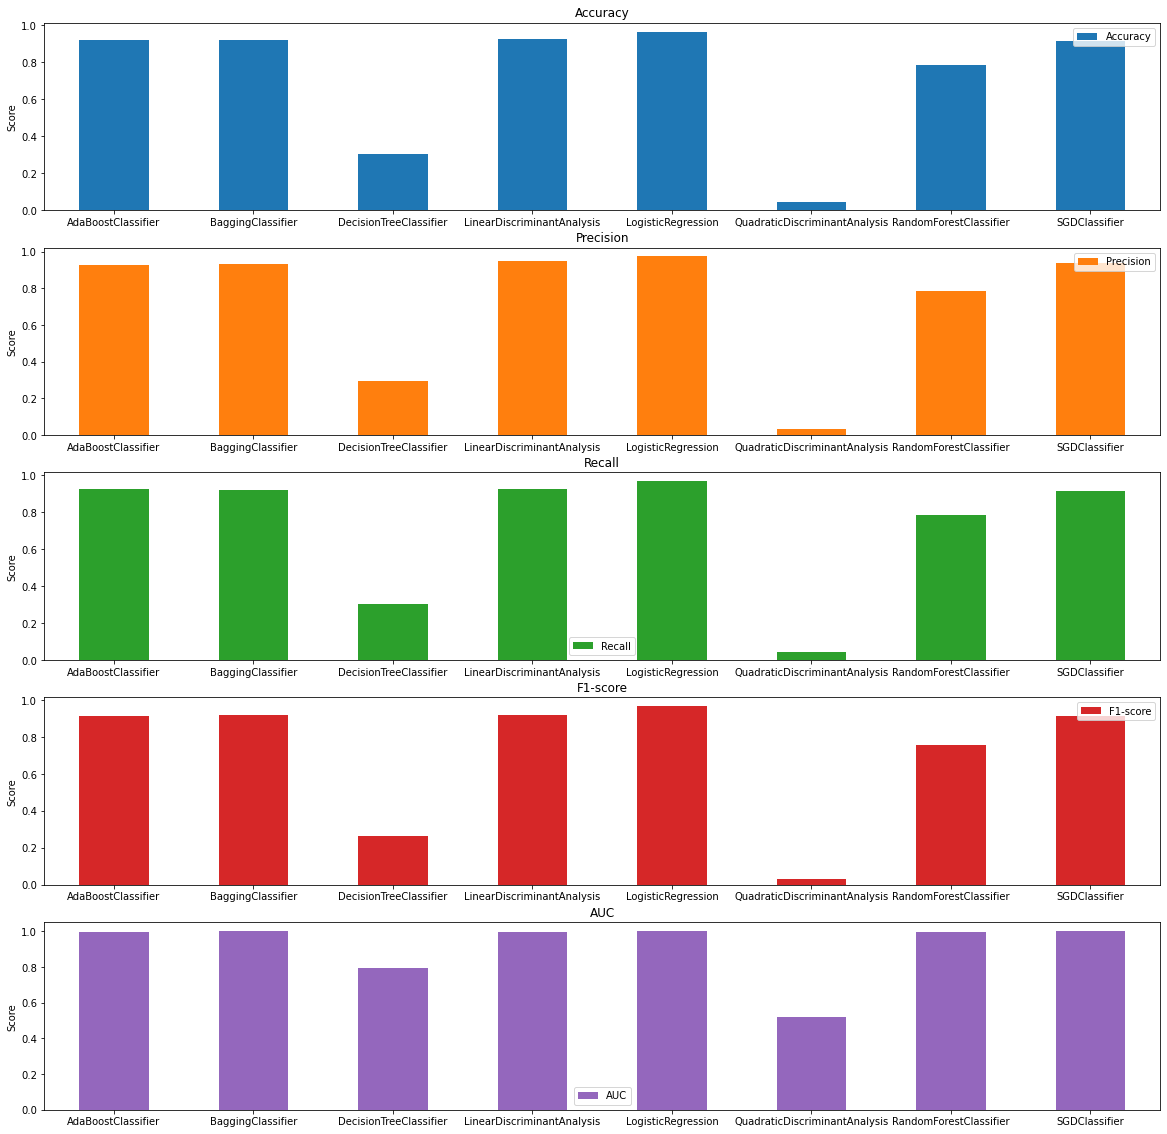

In [8]:
hR.predictionResult(dfTest, clfSelection)
hR.plotBarChart()